# Inference Review

## About

- Review loading model / tokenizer
- Review loading dataset
- Sample prediction

## Import

In [1]:
import pathlib
import sklearn
import datasets
import pandas as pd
import torch

import numpy as np
import transformers
import os
import json
from ts.utils.util  import map_class_to_label
from tqdm import tqdm, trange
import time
import torchviz
import torch.nn as nn


## Load model/tokenizer artifact

In [2]:
model_dir ='../artifacts/model/distilbert-base-uncased/'

load model

In [3]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(model_dir)

In [4]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [5]:
model.config

DistilBertConfig {
  "_name_or_path": "../artifacts/model/distilbert-base-uncased/",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "ACCESSORY",
    "1": "BOOT",
    "2": "CELLULAR_PHONE_CASE",
    "3": "CHAIR",
    "4": "EARRING",
    "5": "FINEEARRING",
    "6": "FINENECKLACEBRACELETANKLET",
    "7": "FINERING",
    "8": "GROCERY",
    "9": "HANDBAG",
    "10": "HARDWARE_HANDLE",
    "11": "HAT",
    "12": "HEALTH_PERSONAL_CARE",
    "13": "HOME",
    "14": "HOME_BED_AND_BATH",
    "15": "HOME_FURNITURE_AND_DECOR",
    "16": "JANITORIAL_SUPPLY",
    "17": "KITCHEN",
    "18": "LAMP",
    "19": "LIGHT_BULB",
    "20": "LIGHT_FIXTURE",
    "21": "OFFICE_PRODUCTS",
    "22": "OUTDOOR_LIVING",
    "23": "PET_SUPPLIES",
    "24": "RUG",
    "25": "SANDAL",
    "26": "SHOES",
    "27": "SOFA",
    "28": "SPORTING_GOODS",
    "29": "TABLE",


model label name to id and id->label name mapping is stord as part of model artifact

In [6]:
labels = model.config.label2id
labels

{'ACCESSORY': 0,
 'BOOT': 1,
 'CELLULAR_PHONE_CASE': 2,
 'CHAIR': 3,
 'EARRING': 4,
 'FINEEARRING': 5,
 'FINENECKLACEBRACELETANKLET': 6,
 'FINERING': 7,
 'GROCERY': 8,
 'HANDBAG': 9,
 'HARDWARE_HANDLE': 10,
 'HAT': 11,
 'HEALTH_PERSONAL_CARE': 12,
 'HOME': 13,
 'HOME_BED_AND_BATH': 14,
 'HOME_FURNITURE_AND_DECOR': 15,
 'JANITORIAL_SUPPLY': 16,
 'KITCHEN': 17,
 'LAMP': 18,
 'LIGHT_BULB': 19,
 'LIGHT_FIXTURE': 20,
 'OFFICE_PRODUCTS': 21,
 'OUTDOOR_LIVING': 22,
 'PET_SUPPLIES': 23,
 'RUG': 24,
 'SANDAL': 25,
 'SHOES': 26,
 'SOFA': 27,
 'SPORTING_GOODS': 28,
 'TABLE': 29,
 'WALL_ART': 30}

In [7]:
id2label = model.config.id2label

In [8]:
id2label

{0: 'ACCESSORY',
 1: 'BOOT',
 2: 'CELLULAR_PHONE_CASE',
 3: 'CHAIR',
 4: 'EARRING',
 5: 'FINEEARRING',
 6: 'FINENECKLACEBRACELETANKLET',
 7: 'FINERING',
 8: 'GROCERY',
 9: 'HANDBAG',
 10: 'HARDWARE_HANDLE',
 11: 'HAT',
 12: 'HEALTH_PERSONAL_CARE',
 13: 'HOME',
 14: 'HOME_BED_AND_BATH',
 15: 'HOME_FURNITURE_AND_DECOR',
 16: 'JANITORIAL_SUPPLY',
 17: 'KITCHEN',
 18: 'LAMP',
 19: 'LIGHT_BULB',
 20: 'LIGHT_FIXTURE',
 21: 'OFFICE_PRODUCTS',
 22: 'OUTDOOR_LIVING',
 23: 'PET_SUPPLIES',
 24: 'RUG',
 25: 'SANDAL',
 26: 'SHOES',
 27: 'SOFA',
 28: 'SPORTING_GOODS',
 29: 'TABLE',
 30: 'WALL_ART'}

a utiliy method provided by torchserver requires labels to also be strings

In [9]:
id2label_str = {str(key): value for key, value in id2label.items()}
id2label_str

{'0': 'ACCESSORY',
 '1': 'BOOT',
 '2': 'CELLULAR_PHONE_CASE',
 '3': 'CHAIR',
 '4': 'EARRING',
 '5': 'FINEEARRING',
 '6': 'FINENECKLACEBRACELETANKLET',
 '7': 'FINERING',
 '8': 'GROCERY',
 '9': 'HANDBAG',
 '10': 'HARDWARE_HANDLE',
 '11': 'HAT',
 '12': 'HEALTH_PERSONAL_CARE',
 '13': 'HOME',
 '14': 'HOME_BED_AND_BATH',
 '15': 'HOME_FURNITURE_AND_DECOR',
 '16': 'JANITORIAL_SUPPLY',
 '17': 'KITCHEN',
 '18': 'LAMP',
 '19': 'LIGHT_BULB',
 '20': 'LIGHT_FIXTURE',
 '21': 'OFFICE_PRODUCTS',
 '22': 'OUTDOOR_LIVING',
 '23': 'PET_SUPPLIES',
 '24': 'RUG',
 '25': 'SANDAL',
 '26': 'SHOES',
 '27': 'SOFA',
 '28': 'SPORTING_GOODS',
 '29': 'TABLE',
 '30': 'WALL_ART'}

load tokenizer

In [10]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
                model_dir
            )

use gpu if available

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


## Test Prediction

query we are predicting on

In [12]:
query = 'men shoes for work'
query  = "men vitamins"
query  = "herbal TEA"
query = " cheap professional men shoes"

get input and attention mask from the tokenizer

In [13]:
res = tokenizer.encode_plus(query, return_tensors="pt",  padding="max_length", truncation=True)
res

{'input_ids': tensor([[  101, 10036,  2658,  2273,  6007,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [14]:
model_res = model(**res)
model_res

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1920,  0.1846, -2.9718, -2.7517, -2.2470, -3.0831, -3.1643, -4.0091,
          0.1129, -3.2293, -4.4044, -3.6812, -1.1271, -0.7257, -2.3415, -1.2938,
         -4.9995, -2.8502, -3.9600, -4.8059, -4.9870, -3.7654, -4.3274, -2.6540,
         -4.5226,  0.2022,  7.1623, -3.2820, -2.2575, -3.4771, -3.2639]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

decode the predictions

In [15]:
topk = 5
ps = torch.nn.functional.softmax(model_res.logits, dim=1)
probs, classes = torch.topk(ps, topk, dim=1)
probs = probs.tolist()
classes = classes.tolist()

In [16]:
probs, classes

([[0.9956250786781311,
   0.0009448082419112325,
   0.0009283467079512775,
   0.000864126777742058,
   0.0003735744976438582]],
 [[26, 25, 1, 8, 13]])

helper method from torchserve

In [17]:
map_class_to_label(probs, id2label_str, classes)

[{'SHOES': 0.9956250786781311,
  'SANDAL': 0.0009448082419112325,
  'BOOT': 0.0009283467079512775,
  'GROCERY': 0.000864126777742058,
  'HOME': 0.0003735744976438582}]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


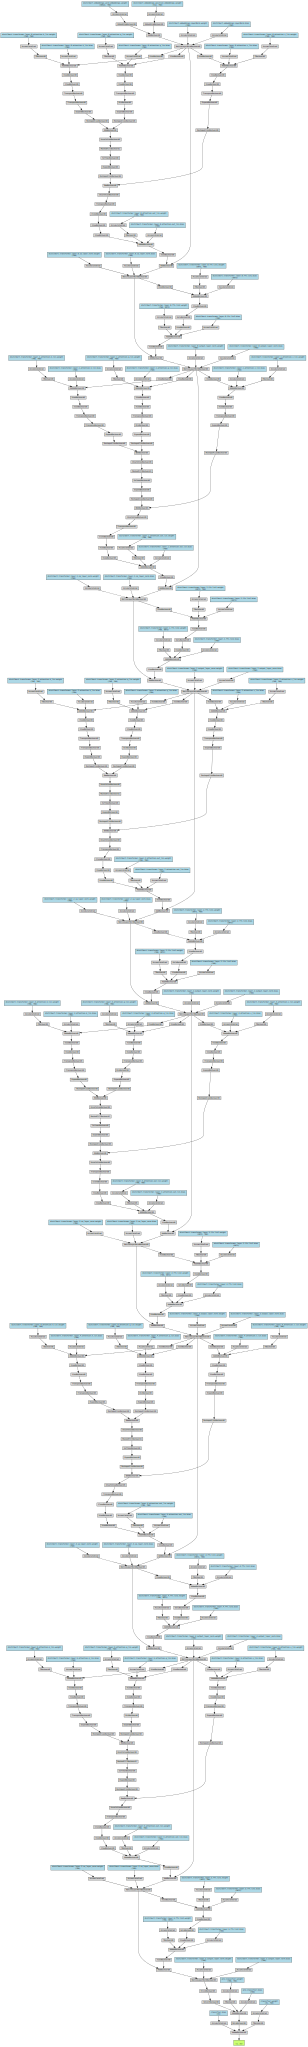

In [18]:
torchviz.make_dot(model_res.logits, params=dict(model.named_parameters()) 
                 # , show_attrs=True, show_saved=True
                 )

In [19]:
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

text_widget = widgets.Text(
    value='men shoes',
    description='Query:',
    disabled=False
)
button_widget = widgets.Button(description="Classify!")

output = widgets.Output()



def predict(event):
    # replace by something useful
    
    query = text_widget.value
    
    res = tokenizer.encode_plus(query, return_tensors="pt",  padding="max_length", truncation=True)

    model_res = model(**res)

    topk = 5
    ps = torch.nn.functional.softmax(model_res.logits, dim=1)
    probs, classes = torch.topk(ps, topk, dim=1)
    probs = probs.tolist()
    classes = classes.tolist()

    classes_output = map_class_to_label(probs, id2label_str, classes)

    

    with output:
        display(f"query:{query}")
        display(classes_output)
        


display(text_widget,output)
display(button_widget,output)

button_widget.on_click(predict)

Text(value='men shoes', description='Query:')

Output()

Button(description='Classify!', style=ButtonStyle())

Output()

## Load dataset

In [20]:
dataset_path = '../artifacts/dataset_processed'

In [21]:
raw_datasets = datasets.load_from_disk(dataset_path)

In [22]:
columns = set(raw_datasets['test'].column_names ) - set(['text','label'])
columns

{'brand', 'item_id', 'item_name', 'main_image_id', 'node'}

In [23]:
set(raw_datasets.column_names )

{'test', 'train', 'valid'}

tokenize the entire dataset

In [24]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True, remove_columns=columns)

Parameter 'function'=<function tokenize_function at 0x7f8b71529f80> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/73 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

In [25]:
tokenized_datasets['test'][0].keys()

dict_keys(['text', 'label', 'input_ids', 'attention_mask'])

In [26]:
# size of input length of model

In [27]:
len ( tokenized_datasets['test'][0]['input_ids'] )

512

create a subset of the test dataset.
feel free to use the full dataset if running on GPU

In [28]:
subset = tokenized_datasets["test"].num_rows

if torch.cuda.device_count() ==0:
    subset = 20
elif torch.cuda.device_count() ==1:
    subset = 1_000

test_dataset = tokenized_datasets["test"].shuffle(42).select(range(subset)) 
test_dataset.set_format(type='torch' )

In [29]:
test_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1000
})

## Predicting on Test dataset

Predicting using the hugging face trainer object.     

Optimized Batch inference workflow

In [30]:
# Define test trainer
test_trainer = transformers.Trainer(model) 
# Make prediction
raw_predictions, raw_label_ids, raw_metrics = test_trainer.predict(test_dataset) 
# Preprocess raw predictions
y_pred = np.argmax(raw_predictions, axis=1)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 8


In [31]:
metric_accuracy = datasets.load_metric('accuracy')

In [32]:
metric_accuracy.compute(predictions = y_pred, references = test_dataset['label'])

{'accuracy': 0.951}

In [33]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

Predicting using the model `__call__` dunder method

need to make sure batches can fit in memory

In [34]:
model( input_ids = test_dataset['input_ids'][0:5].to(device) 
      , attention_mask = test_dataset['attention_mask'][0:5].to(device) )

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1082, -4.8072, -4.1031, -2.8711, -3.8464, -5.6248, -3.7824, -3.9358,
         -2.8537, -2.7639, -4.9115, -0.6522, -1.5376, -1.3590, -1.9575,  0.7591,
         -1.5002, -3.2069, -2.6525, -6.1055, -1.4649, -3.3567, -2.7202, -1.9258,
          7.9399, -5.0814, -4.0411, -2.3976, -2.3428, -2.9803, -1.0082],
        [-4.6291, -2.9154, 12.2323, -4.4056, -2.4733, -2.2858, -4.4963, -4.0348,
         -3.1334, -3.5486, -3.4558, -5.2676, -2.9150, -1.5664, -2.6958, -1.8794,
         -2.3776, -3.5897, -4.9921, -3.0801, -3.7242, -1.7311, -3.6705, -4.3851,
         -4.8293, -3.6955, -2.3233, -3.4109, -5.3091, -3.3041, -3.4737],
        [-4.7986, -3.5530, -3.6772, -4.0961, -2.0813, -2.9655, -2.2605, -3.9891,
          9.1074, -3.4398, -3.8116, -2.7785,  0.6277, -1.7498, -2.2536, -2.8048,
         -5.3864, -0.2619, -5.1785, -3.8579, -5.3309, -3.3271, -2.7387,  0.9690,
         -4.3564, -4.1289, -3.0285, -3.6563, -3.1287, -3.8954, -6.2609],
        [

helper method that we can use to compute accuracy on our full dataset. 

We can't use HF Trainer object , because it is hard to use with the torcshcript model (future optimization)

In [35]:
def prediction_batch(model, dataset, device = device, batch_size = 8):
    l = len(dataset)
    all_y_preds = []
    # make sure model is in eval mode ; not computing gradients
    model.eval()
    
    # feed model to cpu/gpu device
    model = model.to(device)
    
    # iterate our dataset in batches
    for ndx in trange(0, l, batch_size):
        
        # take precomputed inut and attention masks
        input_ids = dataset['input_ids'][ndx:ndx+batch_size].to(device) 
        attention_mask = dataset['attention_mask'][ndx:ndx+batch_size].to(device) 
        
        with torch.no_grad():        
            res = model( input_ids = input_ids, attention_mask = attention_mask )
            
            # output of torchscript model doesn't have logits property 
            #logits = res.logits.detach().cpu().numpy()
            
            logits = res[0].detach().cpu().numpy()
            
            y_preds = np.argmax(logits, axis=1)
            
            all_y_preds.extend(y_preds)
    
    # accuracy on whole dataset
    accuracy = metric_accuracy.compute(predictions = all_y_preds, references = dataset['label'])
    
    return accuracy

In [36]:
prediction_batch(model,test_dataset, device=device )

100%|██████████| 125/125 [00:17<00:00,  7.06it/s]


{'accuracy': 0.951}

## Predicting on single input

In [37]:
%%timeit -r 3 -n 5

device_current = 'cpu'
model.to(device_current)

model( input_ids =res['input_ids'].to(device_current)
      , attention_mask =res['attention_mask'].to(device_current) )

124 ms ± 16.3 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [38]:
%%timeit -r 3 -n 5

if torch.cuda.is_available():
    device_current = 'cuda'
    model.to(device_current)

    model( input_ids =res['input_ids'].to(device_current)
          , attention_mask =res['attention_mask'].to(device_current) )

25.2 ms ± 7.68 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
